In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymysql

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc #한글지원
import platform
import seaborn as sns
plt.rc("font",family='Malgun Gothic') #한글_글꼴
plt.rcParams['axes.unicode_minus'] = False #음수표시

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

file_dir = './data/'

In [29]:
df = pd.read_csv(file_dir + '01_M02_DC_train_pre.csv').iloc[:, 1:]
df = df.dropna()
print(df.shape)
df[:5]

(5092348, 24)


,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5092355 entries, 0 to 5092354
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   time                     int64  
 2   Tool                     object 
 3   stage                    int64  
 4   Lot                      int64  
 5   runnum                   int64  
 6   recipe                   int64  
 7   recipe_step              int64  
 8   IONGAUGEPRESSURE         float64
 9   ETCHBEAMVOLTAGE          float64
 10  ETCHBEAMCURRENT          float64
 11  ETCHSUPPRESSORVOLTAGE    float64
 12  ETCHSUPPRESSORCURRENT    float64
 13  FLOWCOOLFLOWRATE         float64
 14  FLOWCOOLPRESSURE         float64
 15  ETCHGASCHANNEL1READBACK  float64
 16  ETCHPBNGASREADBACK       float64
 17  FIXTURETILTANGLE         float64
 18  ROTATIONSPEED            float64
 19  ACTUALROTATIONANGLE      float64
 20  FIXTURESHUTTERPOSITION   float64
 21  ETCHSOUR

# 모델링
### K-means

In [30]:
df = df[['ETCHAUXSOURCETIMER', 'ETCHAUX2SOURCETIMER', 'ETCHSOURCEUSAGE', 'ETCHBEAMCURRENT', 'ETCHBEAMVOLTAGE',
'ETCHSUPPRESSORCURRENT', 'ETCHSUPPRESSORVOLTAGE', 'FLOWCOOLFLOWRATE', 'ETCHPBNGASREADBACK', 'ETCHGASCHANNEL1READBACK',
'FLOWCOOLPRESSURE', 'IONGAUGEPRESSURE', 'FIXTURETILTANGLE', 'ACTUALROTATIONANGLE', 'ACTUALSTEPDURATION']]
df[:5]

,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ETCHSOURCEUSAGE,ETCHBEAMCURRENT,ETCHBEAMVOLTAGE,ETCHSUPPRESSORCURRENT,ETCHSUPPRESSORVOLTAGE,FLOWCOOLFLOWRATE,ETCHPBNGASREADBACK,ETCHGASCHANNEL1READBACK,FLOWCOOLPRESSURE,IONGAUGEPRESSURE,FIXTURETILTANGLE,ACTUALROTATIONANGLE,ACTUALSTEPDURATION
0,2.871511,3.175941,2.39537,-0.959509,-0.958814,-0.939043,-0.946194,-2.842907,-2.783162,-1.751661,-2.332807,-0.079428,2.027848,-0.122437,4.037785
1,2.871511,3.175941,2.39537,-0.959651,-0.958928,-0.939043,-0.946103,-2.842907,-2.780884,-1.743905,-2.332807,-0.079419,2.027848,-0.122437,4.037785
2,2.871511,3.175941,2.39537,-0.960006,-0.959156,-0.939043,-0.946057,-2.841850,-2.780884,-1.743905,-2.332807,-0.079409,2.027848,-0.122437,4.037785
3,2.871511,3.175941,2.39537,-0.959297,-0.958928,-0.939043,-0.946148,-2.841850,-2.780884,-1.747158,-2.332807,-0.079420,2.027848,-0.122437,4.037785
4,2.871511,3.175941,2.39537,-0.959438,-0.959269,-0.939043,-0.946057,-2.841850,-2.784389,-1.747158,-2.332807,-0.079430,2.027848,-0.122437,4.037785


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df)

In [31]:
km = KMeans(n_clusters=3, n_init=10, random_state=42)

km.fit(df)

# 군집 결과 확인
df['km'] = km.labels_

### 시각화

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)

df2 = df.sample(50000)
X_t = tsne.fit_transform(df2)
tsne_df = pd.DataFrame(X_t, columns = ['val0', 'val1', 'val2'])
tsne_df['km'] = df['km']

MovieWriter ffmpeg unavailable; using Pillow instead.


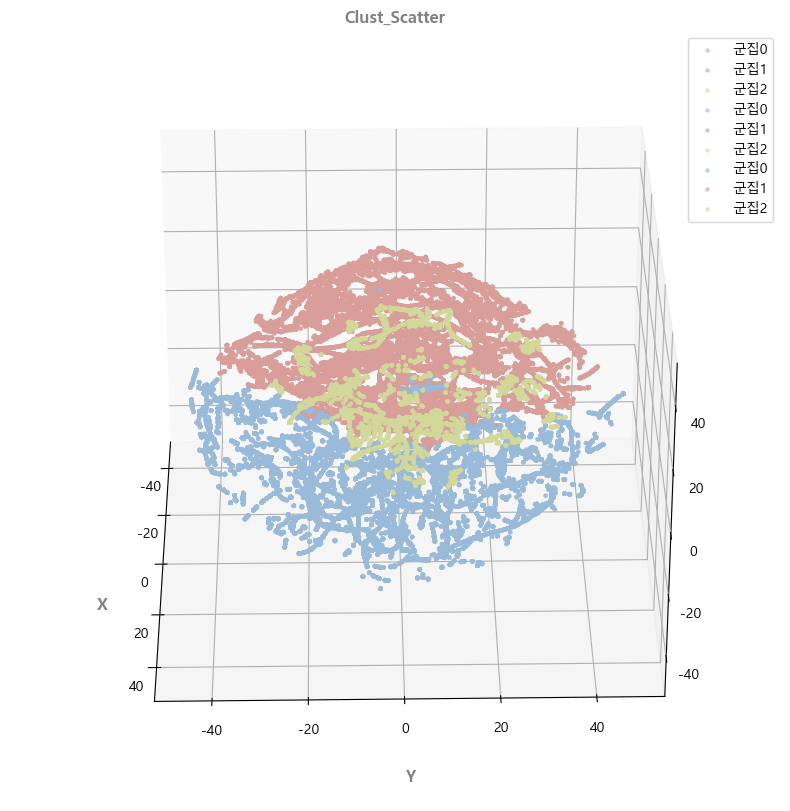

In [101]:
from matplotlib import animation 

def init():
    ax.set_xlabel("X", fontdict=fontlabel, labelpad=16)
    ax.set_ylabel("Y", fontdict=fontlabel, labelpad=16)
    ax.set_title("Clust_Scatter", fontdict=fontlabel)

    for i, cc in zip([0,1,2], ['#9ABAD9', '#D99E9A', '#D2D99A']):
        temp = tsne_df[tsne_df['km'] == i]
        ax.scatter(temp['val0'], temp['val1'], temp['val2'], c=cc, label='군집{}'.format(i), s=5, alpha=0.5)
        plt.legend(loc="upper right")
    
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

fig, ax = plt.subplots(ncols=1, figsize=(10, 10), subplot_kw={"projection":"3d"})

fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('mpl3d_scatter.gif', fps=30)